<a href="https://colab.research.google.com/github/sonalirungta/2019-07-29-python_live/blob/master/%5BPublic%5D_Intro_to_Data_Science_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wonderland Investments Real Estate Analysis

#### [[Slides]](https://docs.google.com/presentation/d/1mYtYVW0xWQnq5SgCf3xX4CgxtznbNATTh8G9j84H7l8/edit?usp=sharing)

## Business Understanding



Wonderland Investments is a residential real estate developer that is completely new to the Phoenix metro-area. They would like to enter this hot market but know little about building in the desert biome. They want to select the right materials, and get some basic guidelines on general features to enter the market competitively. 

## Data Understanding


The data provided was gathered through the [Maricopa County Assessor's](https://mcassessor.maricopa.gov/) API using the [MCAAPI Python Library](https://pypi.org/project/mcaapi/). It was gathered in September, 2021, and was not randomly sampled.

A copy of the data can be found [here](https://raw.githubusercontent.com/foxbatcs/mca_data/master/202109_mca_10k_residential.csv).

The csv has 15 columns and 10,360 rows.

It contains the following features:

 * lot_size_sf
 * city
 * deed_date
 * price_usd
 * sale_date
 * lat
 * lon
 * build_yr
 * build_size_sf
 * patio_ct
 * patio_type
 * wall_type
 * roof_type
 * bath_fixtures_ct
 * parking_type


## Business Problem

**Initial Questions**
 * What is the median lot and building square footage?
 * What is the median building-to-lot square footage ratio?
 * What are the most popular building materials?
 * What expected price point should these homes be sold for?

**Additional Questions**
 * What is the relationship between `build_yr` vs `lot_size_sf` & `build_size_sf`?
 * What is the relationship between `build_yr` vs `wall_type` & `roof_type`?
 * Do these relationships affect our recommendation to the stakeholder?

## Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/foxbatcs/mca_data/master/202109_mca_10k_residential.csv")

In [ ]:
df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
0,25063,PHOENIX,04/24/2020,525000.0,04/01/2020,33.352338,-112.156826,2007.0,4917.0,2.0,Covered,Frame Wood,Concrete Tile,13.0,GR
1,20756,PHOENIX,11/14/2017,337500.0,11/01/2017,33.352386,-112.157233,2007.0,2938.0,2.0,Covered,Frame Wood,Concrete Tile,14.0,GR
2,20810,PHOENIX,04/03/2020,545000.0,03/01/2020,33.352385,-112.157580,2007.0,5588.0,2.0,Covered Slab,Frame Wood,Concrete Tile,14.0,GR
3,20862,PHOENIX,07/16/2020,550000.0,05/01/2020,33.352384,-112.157927,2007.0,3849.0,4.0,Covered Slab,Frame Stucco,Concrete Tile,14.0,GR
4,22101,PHOENIX,04/10/2019,NaN,NaN,33.352383,-112.158284,2007.0,5588.0,2.0,Covered Slab,Frame Wood,Concrete Tile,14.0,GR


In [ ]:
df.shape

(10390, 15)

#### Null Values

In [ ]:
df.isna().mean()

lot_size_sf         0.000000
city                0.000000
deed_date           0.000481
price_usd           0.408181
sale_date           0.407603
lat                 0.003176
lon                 0.003176
build_yr            0.000096
build_size_sf       0.000096
patio_ct            0.000096
patio_type          0.000096
wall_type           0.000096
roof_type           0.000096
bath_fixtures_ct    0.000192
parking_type        0.060828
dtype: float64

If we want to use price as a target, we have to drop null values. This reduced the data significantly, but we still have about 5800 rows.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(5847, 15)

### Exploratory Data Analysis

#### Descriptive Stats

In [ ]:
df.describe()

,lot_size_sf,price_usd,lat,lon,build_yr,build_size_sf,patio_ct,bath_fixtures_ct
count,5847.000000,5.847000e+03,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,9898.730289,3.958803e+05,33.504270,-112.083762,1996.074739,2160.190354,1.085172,8.644262
std,16198.191054,5.883515e+05,0.132147,0.227354,16.533032,1069.021500,0.800443,3.140677
min,692.000000,1.600000e+04,33.206553,-112.759270,1900.000000,550.000000,0.000000,3.000000
25%,5403.000000,1.853795e+05,33.410970,-112.268864,1986.000000,1542.500000,1.000000,6.000000
50%,7009.000000,2.690000e+05,33.477879,-112.110219,2000.000000,1922.000000,1.000000,8.000000
75%,9125.000000,3.850000e+05,33.597460,-111.902087,2006.000000,2436.000000,1.000000,10.000000
max,775699.000000,1.800000e+07,33.974363,-111.584265,2021.000000,13930.000000,12.000000,39.000000


Query: "scientific notation in pd.describe()"

Source: https://stackoverflow.com/questions/17737300/suppressing-scientific-notation-in-pandas

Fix Scientific Notation: 

`pd.options.display.float_format = '{:20,.2f}'.format`

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
df.describe()

,lot_size_sf,price_usd,lat,lon,build_yr,build_size_sf,patio_ct,bath_fixtures_ct
count,"5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00"
mean,"9,898.73","395,880.29",33.50,-112.08,"1,996.07","2,160.19",1.09,8.64
std,"16,198.19","588,351.55",0.13,0.23,16.53,"1,069.02",0.80,3.14
min,692.00,"16,000.00",33.21,-112.76,"1,900.00",550.00,0.00,3.00
25%,"5,403.00","185,379.50",33.41,-112.27,"1,986.00","1,542.50",1.00,6.00
50%,"7,009.00","269,000.00",33.48,-112.11,"2,000.00","1,922.00",1.00,8.00
75%,"9,125.00","385,000.00",33.60,-111.90,"2,006.00","2,436.00",1.00,10.00
max,"775,699.00","18,000,000.00",33.97,-111.58,"2,021.00","13,930.00",12.00,39.00


#### What is the median lot and building square footage for the data?

In [ ]:
df['lot_size_sf'].median()

7009.0

In [ ]:
df.build_size_sf.median()

1922.0

#### What is the median building-to-lot square footage ratio for all the data?

In [ ]:
df.build_size_sf.median() / df.lot_size_sf.median()

0.27421886146383223

#### New Question: What is the relationship between `build_yr` vs `lot_size_sf` and `build_size_sf`?

This graph shows the data grouped by `build_yr`, with the median `build_size_sf` for each year represented.

Text(0, 0.5, 'Build Size (sqft)')

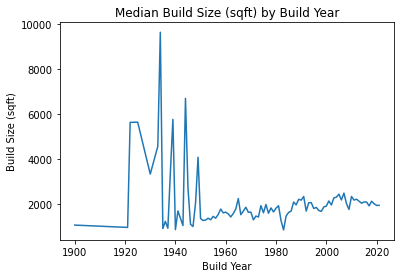

In [ ]:
df.groupby('build_yr')['build_size_sf'].median().plot(kind='line')
plt.title("Median Build Size (sqft) by Build Year")
plt.xlabel("Build Year")
plt.ylabel("Build Size (sqft)")

This graph shows the data grouped by `build_yr`, with the median `lot_size_sf` for each year represented.

Text(0, 0.5, 'Lot Size (sqft)')

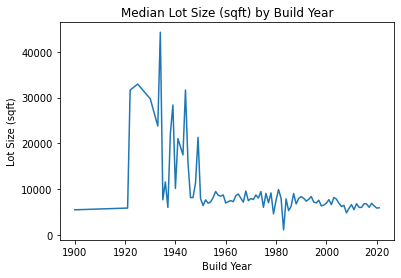

In [ ]:
df.groupby('build_yr')['lot_size_sf'].median().plot(kind='line')
plt.title("Median Lot Size (sqft) by Build Year")
plt.xlabel("Build Year")
plt.ylabel("Lot Size (sqft)")

Since data for all years is very noisy, we will cap our data back 20 years and look at more modern homes only. This also excludes the giant peak in the data we see. This could be a result of events during those decades, or it could be an artifact from the data gathering methodology. The data is also not a random sample, so we will assume it is an artifact and decide to exclude it for reliability reasons as well. This still leaves us with about 2400 samples.

In [ ]:
# the last 20 years of median build_size_sf grouped by build_yr
df.groupby('build_yr')['build_size_sf'].median().tail(20)

build_yr
2,002.00               1,957.00
2,003.00               2,270.00
2,004.00               2,303.50
2,005.00               2,436.00
2,006.00               2,181.00
2,007.00               2,483.50
2,008.00               2,018.00
2,009.00               1,759.50
2,010.00               2,333.00
2,011.00               2,174.00
2,012.00               2,213.50
2,013.00               2,125.00
2,014.00               2,035.00
2,015.00               2,088.00
2,016.00               2,088.00
2,017.00               1,916.00
2,018.00               2,122.00
2,019.00               2,010.00
2,020.00               1,939.00
2,021.00               1,941.00
Name: build_size_sf, dtype: float64

We can see much less noisy data with this set, so let's save it to a variable and explore further.

In [ ]:
# past20_df is where build_yr is greater than or equal to 2002
past20_df = df[df.build_yr >= 2002]
past20_df.shape

(2484, 15)

In [ ]:
past20_df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
0,25063,PHOENIX,04/24/2020,"525,000.00",04/01/2020,33.35,-112.16,"2,007.00","4,917.00",2.00,Covered,Frame Wood,Concrete Tile,13.00,GR
1,20756,PHOENIX,11/14/2017,"337,500.00",11/01/2017,33.35,-112.16,"2,007.00","2,938.00",2.00,Covered,Frame Wood,Concrete Tile,14.00,GR
2,20810,PHOENIX,04/03/2020,"545,000.00",03/01/2020,33.35,-112.16,"2,007.00","5,588.00",2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR
3,20862,PHOENIX,07/16/2020,"550,000.00",05/01/2020,33.35,-112.16,"2,007.00","3,849.00",4.00,Covered Slab,Frame Stucco,Concrete Tile,14.00,GR
5,18274,PHOENIX,12/28/2016,"430,000.00",12/01/2016,33.35,-112.16,"2,007.00","5,588.00",3.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR


The median build size for a residential home in `past20_df` is 2096 sq ft.

In [ ]:
past20_df['build_size_sf'].median()

2096.0

This is about 9% more than the overall median of `df` (all years since 1900).

In [ ]:
past20_df['build_size_sf'].median()/df['build_size_sf'].median()

1.0905306971904267

The median lot size for a residential home in `past20_df` is 6640 sq ft.

In [ ]:
past20_df['lot_size_sf'].median()

6640.5

This is about 5% smaller than the overall median of `df` (all years since 1900).

In [ ]:
past20_df['lot_size_sf'].median()/df['lot_size_sf'].median()

0.9474247396204879

Based on this, there is a change from the entire dataset compared to the last 20 years. Going forward we will continue to explore only `past20_df`.

The `build_size_sf`-to-`lot_size_sf` ratio of `past20_df` is about 32%. This means we want our floor plans to be roughtly 1/3 of the square footage of the lot.

In [ ]:
past20_df['build_size_sf'].median()/past20_df['lot_size_sf'].median()

0.315638882614261

#### What are the most popular building materials in `past20_df`?

Again, we want to *just* focus on `past20_df` to make sure we are building homes that are desired in a modern market.

##### Wall Type

In [ ]:
past20_df['wall_type'].value_counts()

Frame Stucco        1319
Frame Wood          1084
8" Stucco             57
8" Painted Block      18
Other                  4
Slump Block            1
Brick                  1
Name: wall_type, dtype: int64

After doing some minor research, there isn't much difference between the `Frame Stucco` and `Frame Wood` in terms of construction. Both are built from wood, Stucco is just an exterior finish. Stucco can also be applied to block, so `8" Stucco` and `8" Painted Block` are also just masonry construction with different coverings.

While they are similar construction, and the difference appears to only be cosmetic, a Wood Frame house with Stucco seems to be the significantly more popular option. This could be for many reasons (maybe cost, durability, repairability, etc) but we'd need further info from a Subject Matter Expert in contracting, construction, or supply chain to know more.

##### Roof Type

In [ ]:
past20_df['roof_type'].value_counts()

Concrete Tile       2253
Built Up              93
Metal                 49
Asphalt Shingle       44
Tile                  31
Wood                  12
Slate                  1
Asbestos Shingle       1
Name: roof_type, dtype: int64

`Concrete Tile` seems to be the clear choice here. `Built Up` refers to a more commercial-style roof that you would typically see over "big-box" stores and warehouses. We see a significant drop of `Asphalt Shingle` homes being built in `past20_df`.

#### What other strong relationships exist in `past20_df`?

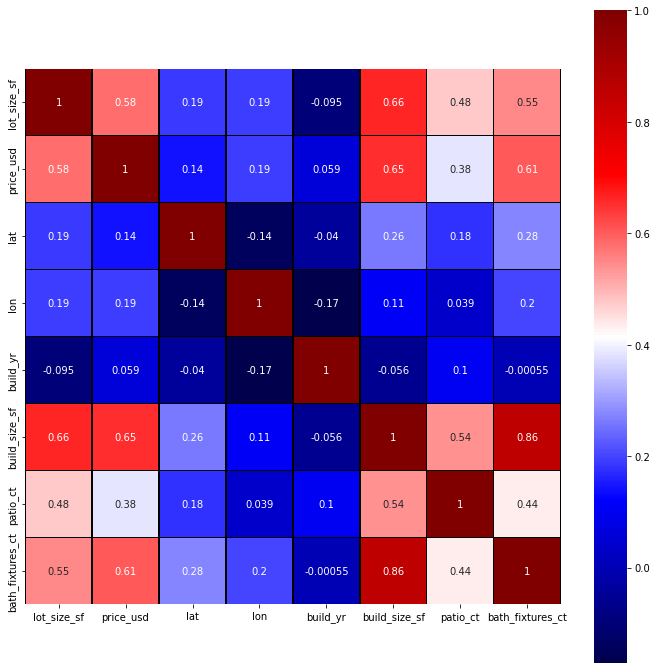

In [ ]:
# Correlation Plot of past20_df
plt.figure(figsize = (12, 12))
sns.heatmap(past20_df.corr(),
            linewidths=0.25,
            square=True,
            cmap='seismic',
            linecolor='k',
            annot=True);

#### What about Parking?

In [ ]:
past20_df['parking_type'].value_counts()

GR    2482
CP       2
Name: parking_type, dtype: int64

We recommend including Garages instead of Covered Parking.

### Train/Test Split

This step allows us to save some unseen data for our model to be evaluated on later. This helps us set important metrics to compare improvements in models.

In [ ]:
from sklearn.model_selection import train_test_split

X = past20_df['build_size_sf'].values.reshape(-1,1)
y = past20_df['price_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modeling

### Baseline (Simple Linear Regression)
**Build Size (Sq Ft) vs Price (USD)**

We will first build a baseline, simple linear regression model to establish some metrics. This will help us make a prediction for a potential price point for our stakeholder to enter the market.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

Build_Size_Input = 2100

reg = LinearRegression().fit(X_train, y_train)
print(f'R-Square: {reg.score(X, y)}%')
print(f'Prediction: ${reg.predict(np.array(Build_Size_Input).reshape(1, -1))[0]}')

R-Square: 0.42495839967488225%
Prediction: $300868.7851222876


#### Build Size Linear Regression Evaluation

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


reg = LinearRegression().fit(X_train, y_train)
print(f'R-Square: {reg.score(X, y)}%')
y_pred = reg.predict(X_test)
print(f'RMSE: ${mse(y_test, y_pred, squared = False)}')

R-Square: 0.42495839967488225%
RMSE: $331227.69294471765


### Multiple Linear Regression

**Build Size (Sq Ft), Lot Size (Sq Ft) vs Price (USD)**

We will try to include some other features to see if we can increase our R-Squared score and reduce our Root Mean-Square Error (RMSE).

In [ ]:
past20_df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
0,25063,PHOENIX,04/24/2020,"525,000.00",04/01/2020,33.35,-112.16,"2,007.00","4,917.00",2.00,Covered,Frame Wood,Concrete Tile,13.00,GR
1,20756,PHOENIX,11/14/2017,"337,500.00",11/01/2017,33.35,-112.16,"2,007.00","2,938.00",2.00,Covered,Frame Wood,Concrete Tile,14.00,GR
2,20810,PHOENIX,04/03/2020,"545,000.00",03/01/2020,33.35,-112.16,"2,007.00","5,588.00",2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR
3,20862,PHOENIX,07/16/2020,"550,000.00",05/01/2020,33.35,-112.16,"2,007.00","3,849.00",4.00,Covered Slab,Frame Stucco,Concrete Tile,14.00,GR
5,18274,PHOENIX,12/28/2016,"430,000.00",12/01/2016,33.35,-112.16,"2,007.00","5,588.00",3.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR


In [ ]:
from sklearn.model_selection import train_test_split

Xm = past20_df[['build_size_sf', 'lot_size_sf']]#.values.reshape(-1,1)
ym = past20_df['price_usd']
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.25, random_state=42)

#### Multiple Linear Regression Evaluation

In [ ]:
reg = LinearRegression().fit(Xm_train, ym_train)
print(f'R-Square: {reg.score(Xm, ym)}%')
ym_pred = reg.predict(Xm_test)
print(f'RMSE: ${mse(ym_test, ym_pred, squared = False)}')

R-Square: 0.4532762024809369%
RMSE: $395899.11825819436


It looks like this increased our R-Square, but also increased our RMSE. This likely means there is multicolinearity. There are various things we could do about that are beyond the scope of this iteration, but could be explored further in future steps. For now, We will use our basic linear model to make preliminary price suggestions and return to our stakeholders with our findings to determine next steps.

## Conclusions

### Home Characteristics

Based on preliminary analysis of the data, we recommend building homes with the following features: 
 - ~2100 sq ft build size
 - ~6700 sq ft lot size
 - Attached Garage
 - Frame Stucco Wall Type
 - Concrete Tile Roof Type

### Price Recommendations

After comparing the metrics between our two models, we will revert back to Simple Linear Regression.

In [ ]:
Build_Size_Input = 2100

reg = LinearRegression().fit(X_train, y_train)
print(f'R-Square: {reg.score(X, y)}%')
print(f'Prediction: ${reg.predict(np.array(Build_Size_Input).reshape(1, -1))[0]}')

R-Square: 0.42495839967488225%
Prediction: $300868.7851222876


In [ ]:
# Given the Median approximate square footage of 2100
# We are looking at a home 10% smaller and larger and recommending a price
Build_Size_Input_s = 2100*0.9
Build_Size_Input_m = 2100
Build_Size_Input_l = 2100*1.1

print(f'Price Prediction (Small): {Build_Size_Input_s} sq ft, ${reg.predict(np.array(Build_Size_Input_s).reshape(1, -1))[0]}')
print(f'Price Prediction (Medium): {Build_Size_Input_m} sq ft, ${reg.predict(np.array(Build_Size_Input_m).reshape(1, -1))[0]}')
print(f'Price Prediction (Large): {Build_Size_Input_l} sq ft, ${reg.predict(np.array(Build_Size_Input_l).reshape(1, -1))[0]}')

Price Prediction (Small): 1890.0 sq ft, $209635.60666325397
Price Prediction (Medium): 2100 sq ft, $300868.7851222876
Price Prediction (Large): 2310.0 sq ft, $392101.96358132106


Based on a poorly performing preliminary model, we would recommend pricing homes as follows:
 * approx `1,890 sq ft`, `$210k`
 * approx `2,100 sq ft`, `$300k`
 * approx `2,310 sq ft`, `$390k`

### Limitations

Due to the poor performance of the initial modeling, we recommend proceeding with Next Steps before committing to any purchasing decisions. Additionally, many factors could change depending on the location of the lot(s) purchased for development.

## Next Steps

 * Gather additional samples randomly
 * Include a greater number of features for each home
 * Gather data on a more frequent basis to capture trends over time
 * Meet with a Supply Chain SME to get a better idea of costs
 * Run this analysis on several candidate development lots